Deep Learning Models for Multi-Output Regression


Adapted from Jason Brownlee's Blog Post to allow hands-on exploration
For me, i store the code as a memory item for future dev and application.

Quote:
"If the dataset is small, it is good practice to evaluate neural network models repeatedly on the same dataset and report the mean performance across the repeats.

This is because of the stochastic nature of the learning algorithm.

Additionally, it is good practice to use k-fold cross-validation instead of train/test splits of a dataset to get an unbiased estimate of model performance when making predictions on new data. Again, only if there is not too much data and the process can be completed in a reasonable time.

Taking this into account, we will evaluate the MLP model on the multi-output regression task using repeated k-fold cross-validation with 10 folds and three repeats.

Each fold the model is defined, fit, and evaluated. The scores are collected and can be summarized by reporting the mean and standard deviation.

The evaluate_model() function below takes the dataset, evaluates the model, and returns a list of evaluation scores, in this case, MAE scores.

Running the example reports the MAE for each fold and each repeat, to give an idea of the evaluation progress.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

At the end, the mean and standard deviation MAE is reported. In this case, the model is shown to achieve a MAE of about 8.184.

You can use this code as a template for evaluating MLP models on your own multi-output regression tasks. The number of nodes and layers in the model can easily be adapted and tailored to the complexity of your dataset."


In [39]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from numpy import asarray
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import plot_model

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=100, n_features=5, n_informative=5, n_targets=2, random_state=2)
  # the original
  # X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=3, random_state=2)
	return X, y

# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mae', optimizer='adam')
	return model

# evaluate a model using repeated k-fold cross-validation
def evaluate_model_last(X, y):
  results = list()
  n_inputs, n_outputs = X.shape[1], y.shape[1]
  # define evaluation procedure
  # original
  # cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
  # enumerate folds
  for train_ix, test_ix in cv.split(X):
    # prepare data
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    # define model
    model = get_model(n_inputs, n_outputs)
    #fit model
    print("Model fit\n\n")
    model.fit(X_train, y_train, verbose=1, epochs=10)
    # evaluate model on test set
    print("Model evaluate\n\n")
    mae = model.evaluate(X_test, y_test, verbose=1)
    # store result
    print('>%.3f' % mae)
    results.append(mae)
  return results

def plot_model_here(model):
  # Generate a plot of the model
  plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

  # Display the plot
  img = plt.imread('model.png')
  plt.figure(figsize=(10, 10))
  plt.imshow(img)
  plt.axis('off')
  plt.show()


# load dataset
X, y = get_dataset()
# evaluate model
results = evaluate_model(X, y)
# summarize performance as Mean Absolute Error (MAE)
print("Model evaluate stats\n\n")
print('MAE: %.3f (%.3f)' % (mean(results), std(results)))

Epoch 1/10
3/3 [==============================] - 1s 5ms/step - loss: 95.0207
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: 94.9991
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 94.9792
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: 94.9595
Epoch 5/10
3/3 [==============================] - 0s 6ms/step - loss: 94.9406
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 94.9211
Epoch 7/10
3/3 [==============================] - 0s 13ms/step - loss: 94.9011
Epoch 8/10
3/3 [==============================] - 0s 7ms/step - loss: 94.8817
Epoch 9/10
3/3 [==============================] - 0s 18ms/step - loss: 94.8620
Epoch 10/10
1/1 [==============================] - 0s 200ms/step - loss: 94.9832
>94.983
Epoch 1/10
3/3 [==============================] - 1s 5ms/step - loss: 93.9163
Epoch 2/10
3/3 [==============================] - 0s 11ms/step - loss: 93.8946
Epoch 3/10
3/3 [==============================] - 

Once a model configuration is chosen, we can use it to fit a final model on all available data and make a prediction for new data.

The example below demonstrates this by first fitting the MLP model on the entire multi-output regression dataset, then calling the predict() function on the saved model in order to make a prediction for a new row of data.

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 95.3313
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 95.3050
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 95.2818
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 95.2583
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 95.2350
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 95.2136
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 95.1915
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 95.1696
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 95.1468
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 95.1243
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 95.1020
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 95.0791
Epoch 13/100
4/4 [==============================]

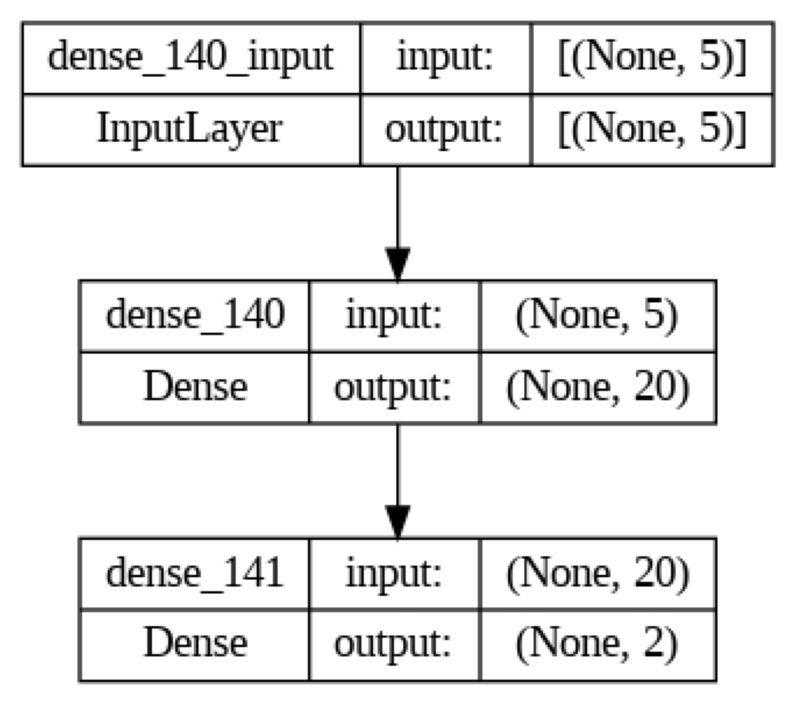

1/1 [==============================] - 0s 46ms/step
Predicted: [-2.9773972 -3.163234 ]


In [14]:

# load dataset
X, y = get_dataset()
n_inputs, n_outputs = X.shape[1], y.shape[1]
# get model
model = get_model(n_inputs, n_outputs)

# fit the model on all data
model.fit(X, y, verbose=1, epochs=100)

plot_model_here(model)

# make a prediction for new data
# original
# row = [-0.99859353,2.19284309,-0.42632569,-0.21043258,-1.13655612,-0.55671602,-0.63169045,-0.87625098,-0.99445578,-0.3677487]
row = [-0.99859353,2.19284309,-0.42632569,-0.21043258,-1.13655612]
newX = asarray([row])
yhat = model.predict(newX)
print('Predicted: %s' % yhat[0])